  location  year         category  rank  query
0   Global  2001  Consumer Brands     1  Nokia
1   Global  2001  Consumer Brands     2   Sony
2   Global  2001  Consumer Brands     3    BMW
3   Global  2001  Consumer Brands     4   Palm
4   Global  2001  Consumer Brands     5  Adobe
               year         rank
count  26955.000000  26955.00000
mean    2015.243369      3.00000
std        3.564683      1.41424
min     2001.000000      1.00000
25%     2013.000000      2.00000
50%     2016.000000      3.00000
75%     2018.000000      4.00000
max     2020.000000      5.00000


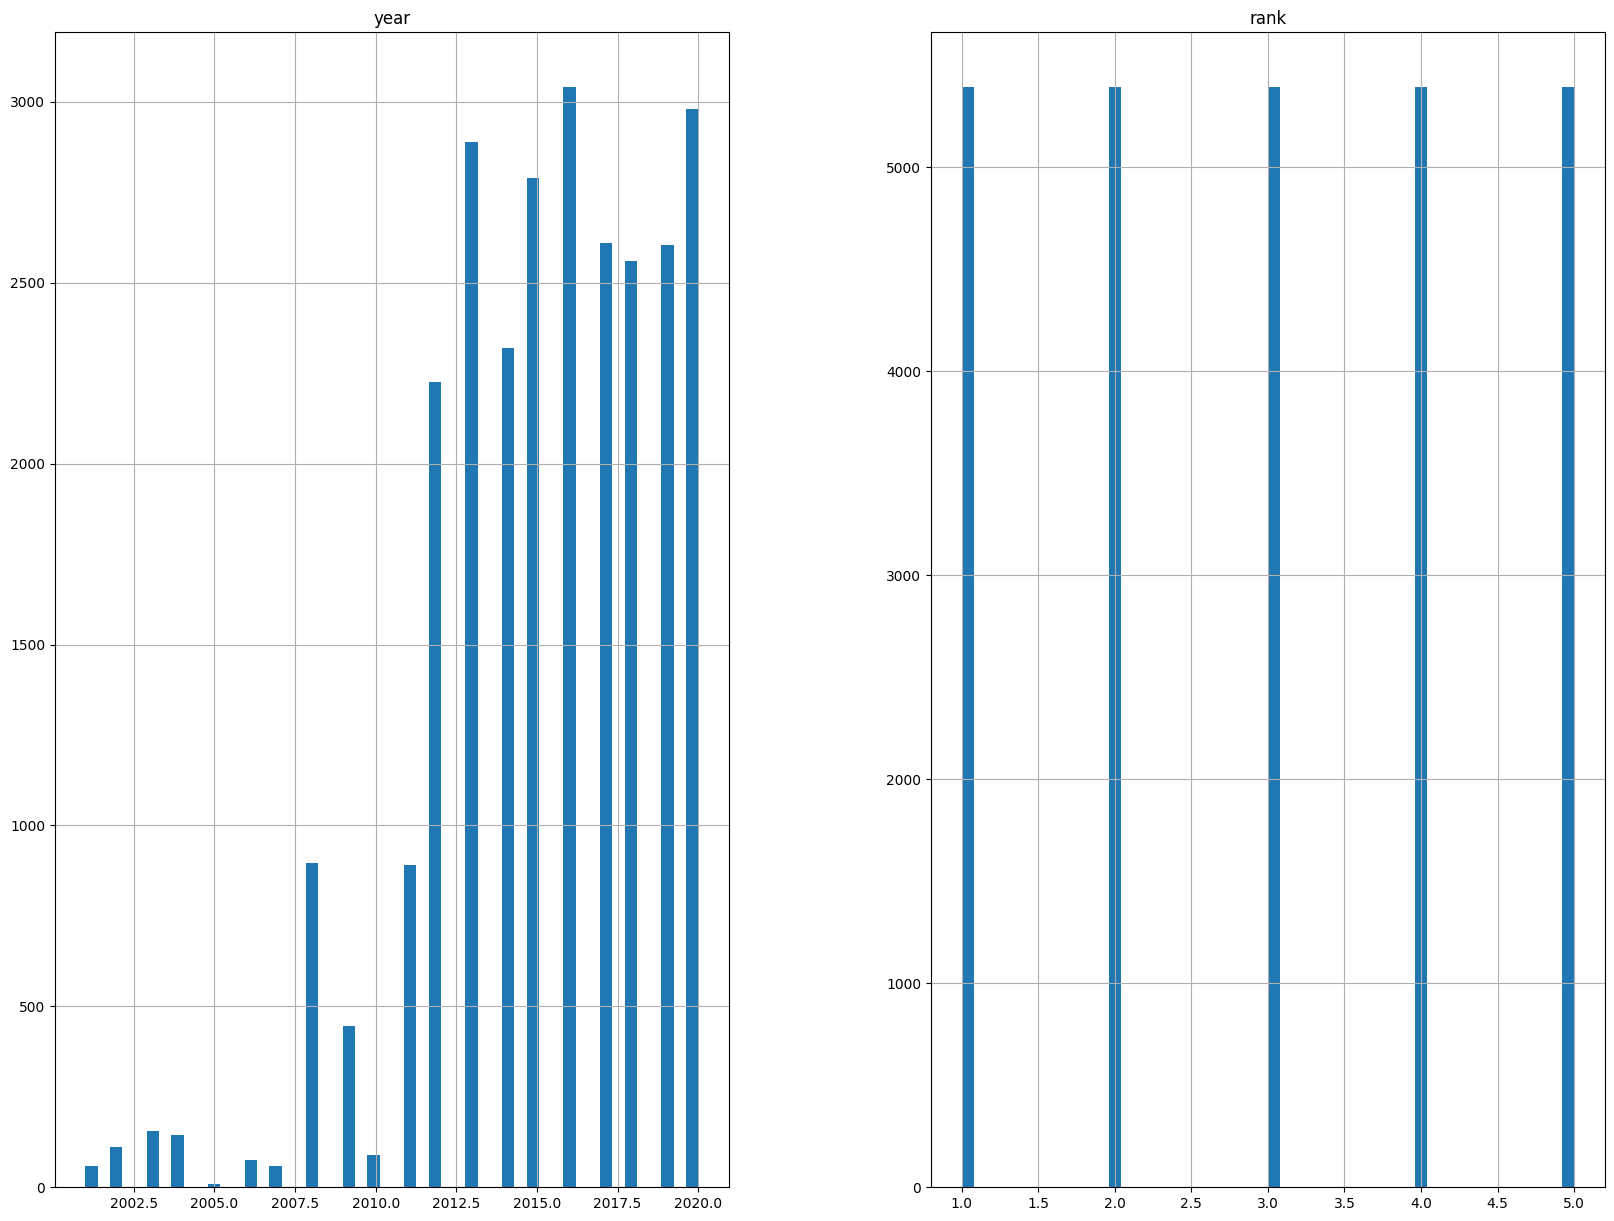

In [32]:
import pandas as pd
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")

# Load the data
file_path = 'trends.csv'
data = pd.read_csv(file_path)

# Show the head of the dataframe
data_head = data.head()
print(data_head)

# Describe the dataframe
data_description = data.describe()
print(data_description)

# Plotting distributions
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

In [3]:
# Convert 'year' to datetime and set as index for time series analysis
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index('year', inplace=True)

# Sort the index
data.sort_index(inplace=True)

# Display the head of the dataframe to confirm changes
data_head = data.head()
print(data_head)

           location         category  rank  query
year                                             
2001-01-01   Global  Consumer Brands     1  Nokia
2001-01-01   Global  Consumer Brands     2   Sony
2001-01-01   Global  Consumer Brands     3    BMW
2001-01-01   Global  Consumer Brands     4   Palm
2001-01-01   Global  Consumer Brands     5  Adobe


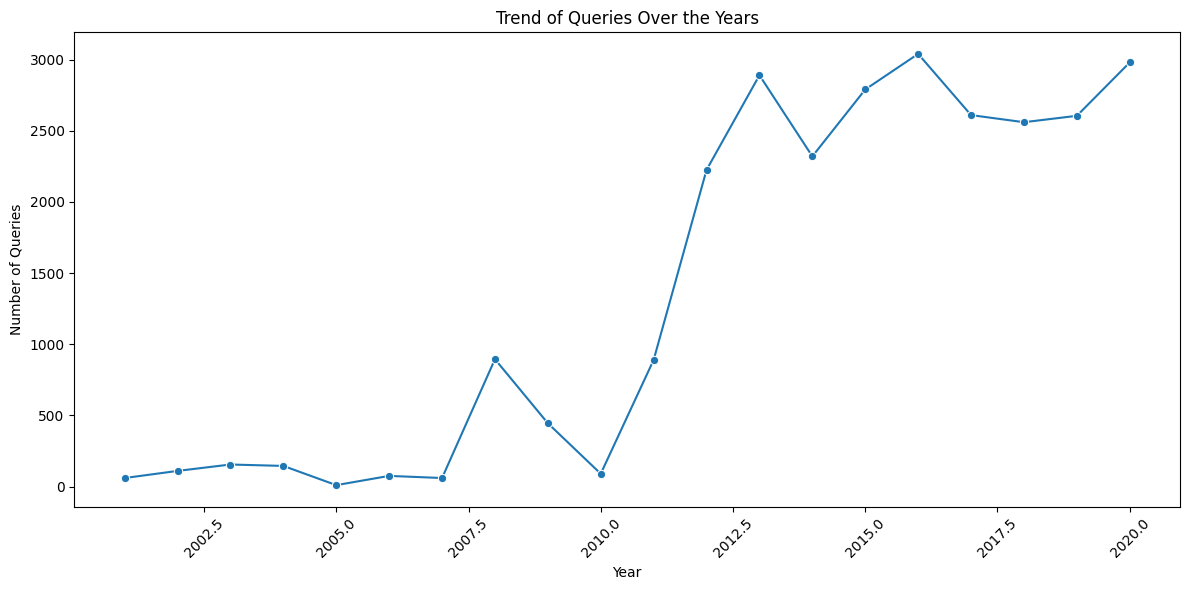

In [5]:
import seaborn as sns
# Group the data by year and count the number of queries
yearly_trend = data.groupby(data.index.year)['query'].count().reset_index()

# Rename columns for clarity
yearly_trend.columns = ['Year', 'Number of Queries']

# Plotting the trend of queries over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Queries', data=yearly_trend, marker='o')
plt.title('Trend of Queries Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Queries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

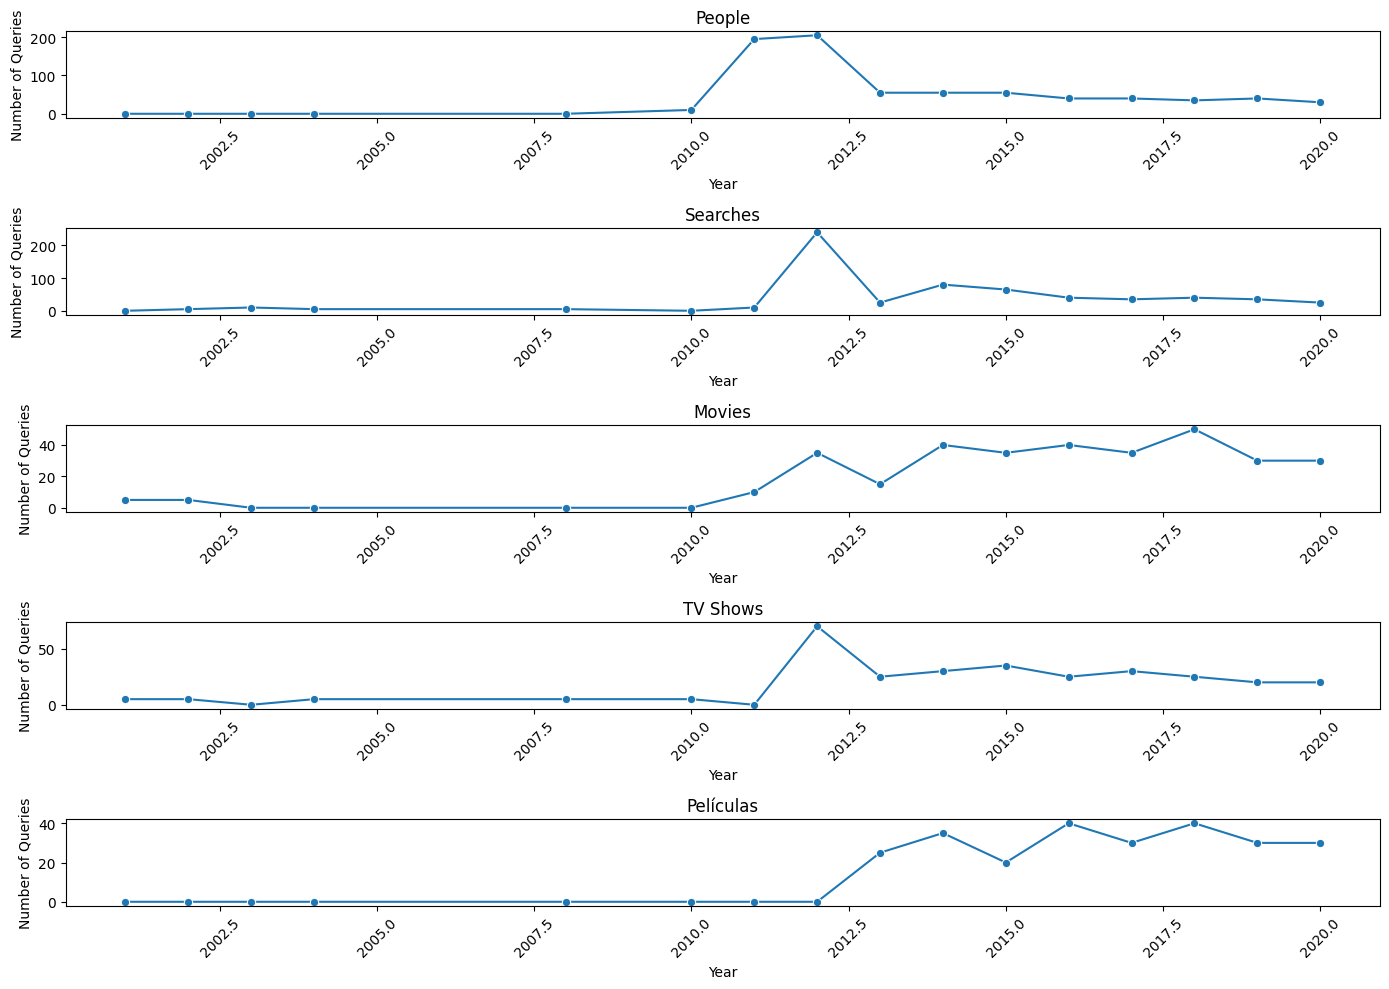

In [6]:
# Optimize the code by reducing the number of subplots and using a more efficient plotting method
# We will plot the trends for a selection of categories to ensure the process completes
selected_categories = data['category'].value_counts().index[:5]

# Filter the data for the selected categories
filtered_data = data[data['category'].isin(selected_categories)]

# Group the filtered data by category and year, then count the number of queries
category_trend = filtered_data.groupby(['category', filtered_data.index.year])['query'].count().unstack().fillna(0)

# Plotting the trends within the selected categories over time
plt.figure(figsize=(14, 10))
for i, category in enumerate(selected_categories):
    plt.subplot(len(selected_categories), 1, i+1)
    sns.lineplot(data=category_trend.loc[category], marker='o')
    plt.title(category)
    plt.xlabel('Year')
    plt.ylabel('Number of Queries')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Identify the top queries within each category over the entire timespan of the dataset
# We will limit to the top 5 categories for brevity

# Get the top 5 categories based on the number of queries
selected_categories = data['category'].value_counts().index[:5]

# Initialize a dictionary to store the top queries for each category
top_queries_per_category = {}

# Using tqdm to show progress
for category in tqdm(selected_categories, desc='Analyzing Categories'):
    # Filter the data for the current category
    category_data = data[data['category'] == category]
    # Find the top 5 queries in this category
    top_queries = category_data['query'].value_counts().head(5)
    # Store the results in the dictionary
    top_queries_per_category[category] = top_queries

# Display the top queries for each category
for category, top_queries in top_queries_per_category.items():
    print('\nCategory:', category)
    print(top_queries)

Analyzing Categories: 100%|██████████████████████| 5/5 [00:00<00:00, 217.38it/s]


Category: People
query
Whitney Houston    32
Amy Winehouse      21
Adele              19
Kate Middleton     15
Donald Trump       11
Name: count, dtype: int64

Category: Searches
query
Gangnam Style      9
Robin Williams     9
Whitney Houston    9
World Cup          9
Euro 2012          7
Name: count, dtype: int64

Category: Movies
query
Black Panther     10
Captain Marvel     7
Suicide Squad      7
Deadpool 2         6
Joker              6
Name: count, dtype: int64

Category: TV Shows
query
Game of Thrones    13
Stranger Things     8
13 Reasons Why      6
The Voice           5
American Idol       4
Name: count, dtype: int64

Category: Películas
query
Annabelle            11
Deadpool              8
Deadpool 2            8
Venom                 8
Bohemian Rhapsody     8
Name: count, dtype: int64


In [8]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


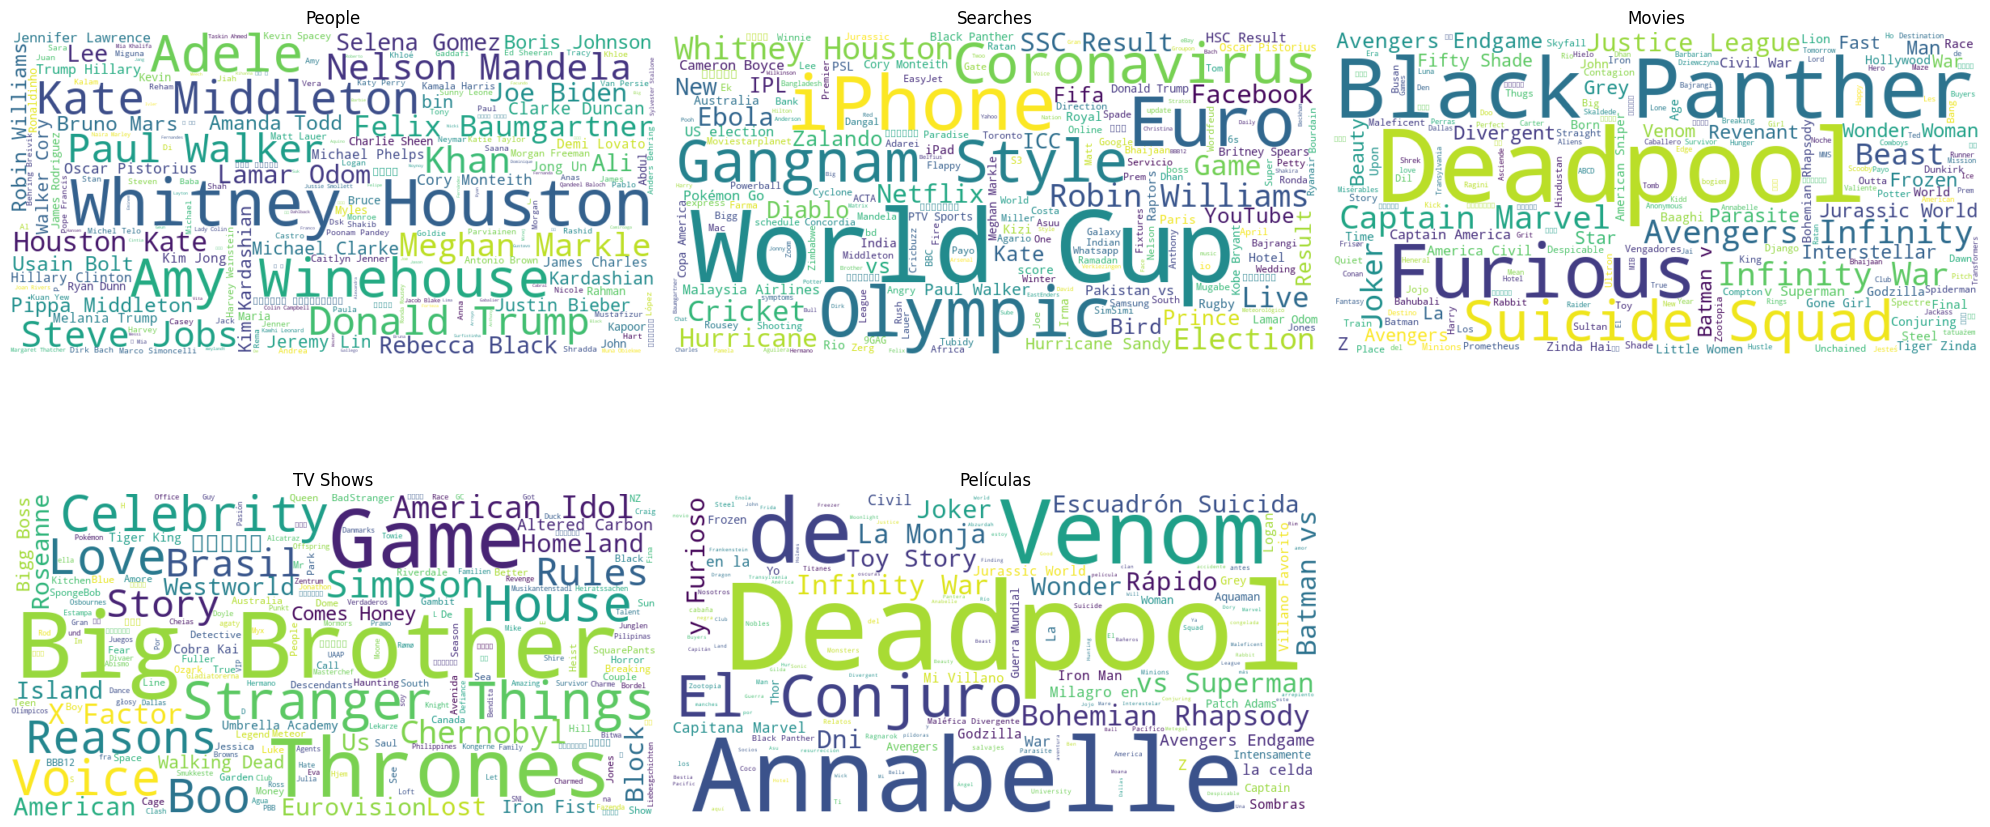

In [9]:
from wordcloud import WordCloud

# Generate word clouds for the top queries in each category
plt.figure(figsize=(20, 10))

for i, category in enumerate(selected_categories, 1):
    plt.subplot(2, 3, i)
    # Combine all queries in the category into one large string
    text = ' '.join(data[data['category'] == category]['query'])
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

data = pd.read_csv('trends.csv')
print(data.head())

  location  year         category  rank  query
0   Global  2001  Consumer Brands     1  Nokia
1   Global  2001  Consumer Brands     2   Sony
2   Global  2001  Consumer Brands     3    BMW
3   Global  2001  Consumer Brands     4   Palm
4   Global  2001  Consumer Brands     5  Adobe


In [13]:
pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


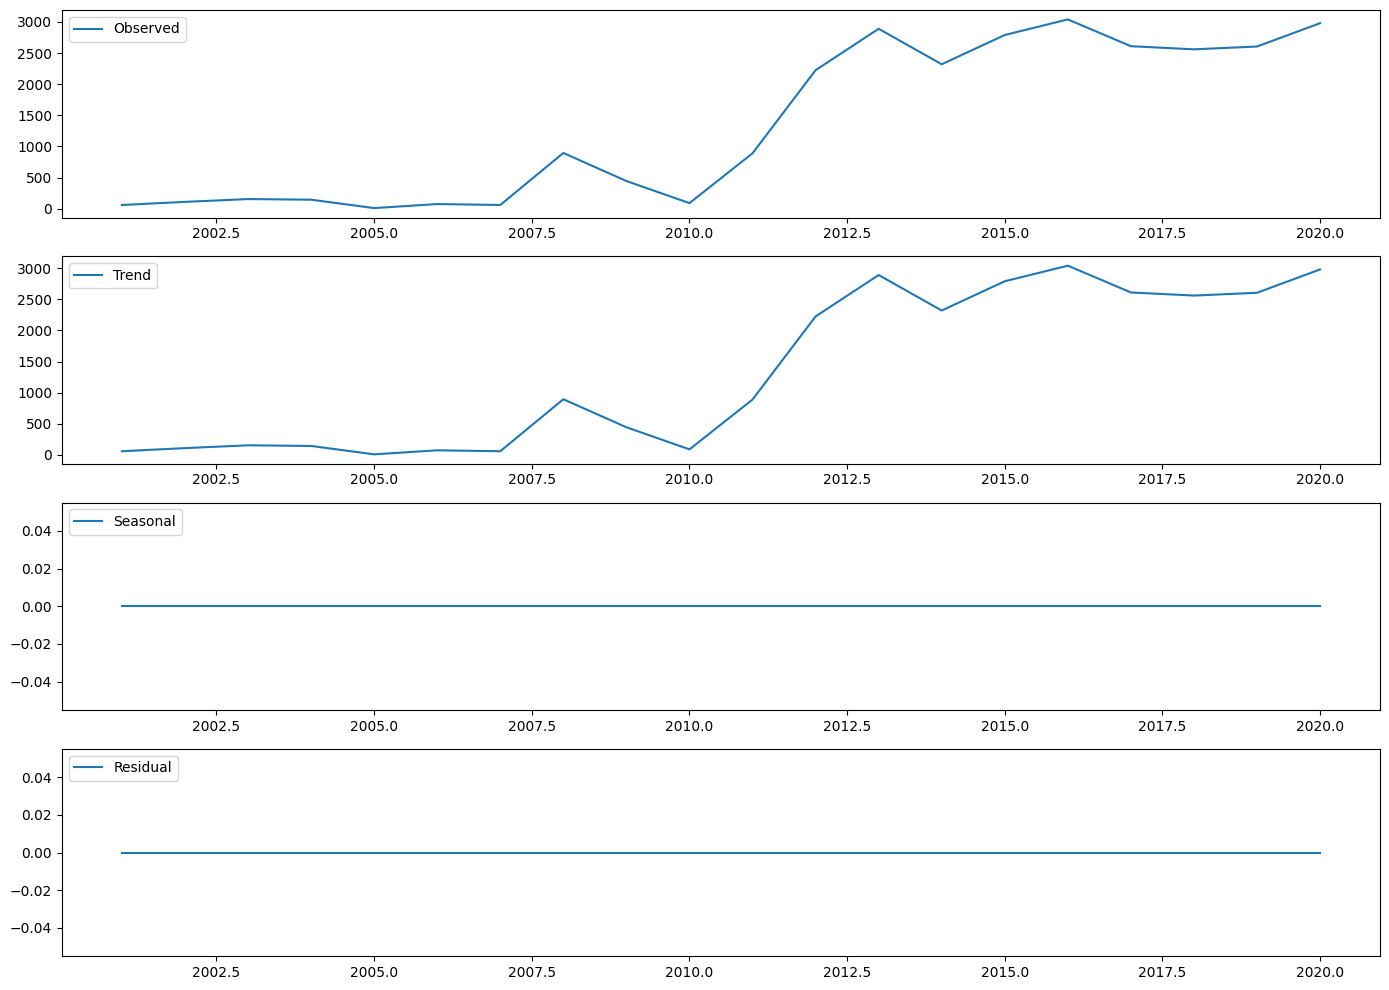

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the index to 'year' for decomposition
yearly_trends.set_index('year', inplace=True)

# Decomposing the trend, seasonality, and residuals
result = seasonal_decompose(yearly_trends['counts'], model='additive', period=1)

# Plotting the decomposed components of the time series
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
# Attempt to diagnose the issue with the forecast generation
# Check the last few entries of the historical data to ensure they are valid
yearly_counts.tail()

,Query_Count
Year,
2016-01-01,3040
2017-01-01,2610
2018-01-01,2560
2019-01-01,2605
2020-01-01,2980


In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Exponential Smoothing model as an alternative to ARIMA
model = ExponentialSmoothing(yearly_counts['Query_Count'],
                             trend='add',
                             seasonal=None,
                             initialization_method='estimated')
model_fit = model.fit()

# Forecast the next 5 years
forecast = model_fit.forecast(steps=5)
forecast_df = pd.DataFrame(forecast, columns=['Forecast'])
forecast_df

/Users/vamsitinku/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


,Forecast
2021-01-01,3104.280842
2022-01-01,3234.763041
2023-01-01,3365.245240
2024-01-01,3495.727439
2025-01-01,3626.209638


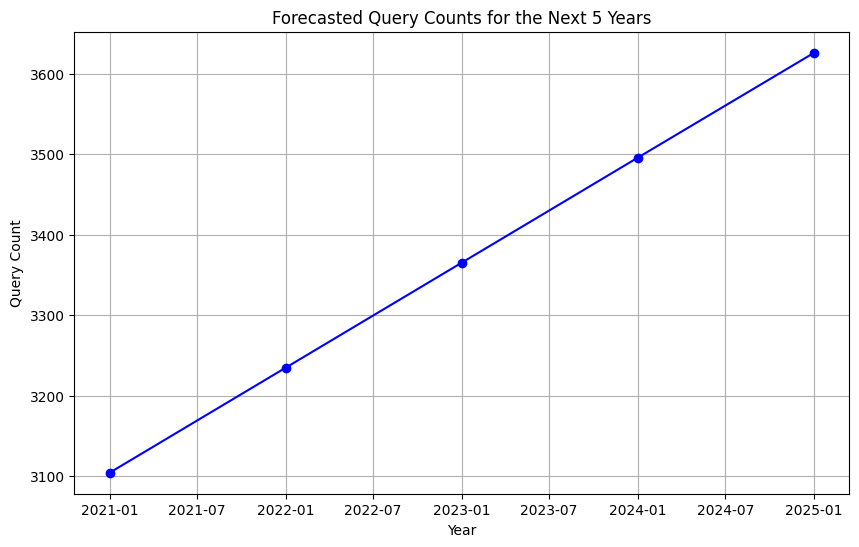

In [22]:
import matplotlib.pyplot as plt

# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['Forecast'], marker='o', linestyle='-', color='b')
plt.title('Forecasted Query Counts for the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Query Count')
plt.grid(True)
plt.show()

In [23]:
# Calculate the percentage increase in query counts from 2021 to 2025 based on the forecast
percentage_increase = ((forecast_df.loc['2025-01-01', 'Forecast'] - forecast_df.loc['2021-01-01', 'Forecast']) / forecast_df.loc['2021-01-01', 'Forecast']) * 100
percentage_increase

16.813195158391693

In [24]:
# Perform time series decomposition to identify trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(yearly_counts, model='additive')

trend = decomposition.trend

trend

Year
2001-01-01      60.0
2002-01-01     110.0
2003-01-01     155.0
2004-01-01     145.0
2005-01-01      10.0
2006-01-01      75.0
2007-01-01      60.0
2008-01-01     895.0
2009-01-01     445.0
2010-01-01      90.0
2011-01-01     890.0
2012-01-01    2225.0
2013-01-01    2890.0
2014-01-01    2320.0
2015-01-01    2790.0
2016-01-01    3040.0
2017-01-01    2610.0
2018-01-01    2560.0
2019-01-01    2605.0
2020-01-01    2980.0
Name: trend, dtype: float64

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 235.85it/s]


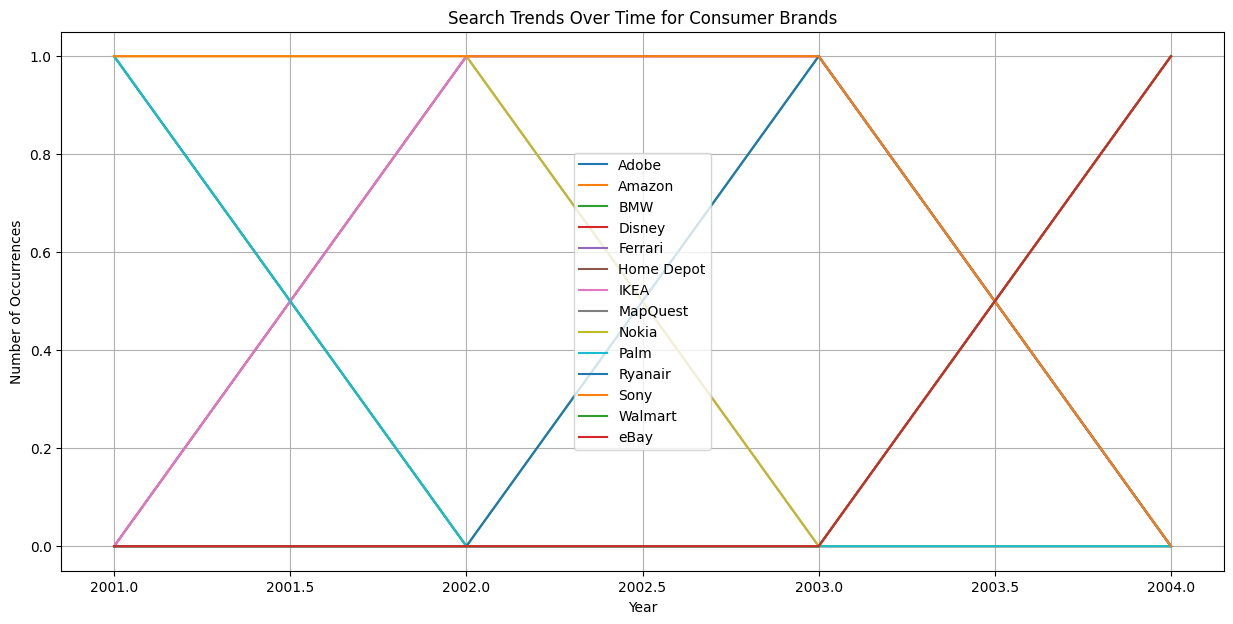

In [30]:
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('trends.csv')

# Adding progress_apply to pandas using tqdm
pd.options.mode.chained_assignment = None

tqdm.pandas()

# Select a category
selected_category = 'Consumer Brands'

# Filter data for the selected category
filtered_data = data[data['category'] == selected_category]

# Group by year and query to see the trend of each query over time
query_trend = filtered_data.groupby(['year', 'query']).size().reset_index(name='counts')

# Pivot the data to have years as the index and queries as columns
pivot_query_trend = query_trend.pivot(index='year', columns='query', values='counts').fillna(0)

# Plot the trend over time for top queries
plt.figure(figsize=(15, 7))
pivot_query_trend.progress_apply(lambda x: plt.plot(pivot_query_trend.index, x, label=x.name))

plt.title('Search Trends Over Time for ' + selected_category)
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.show()

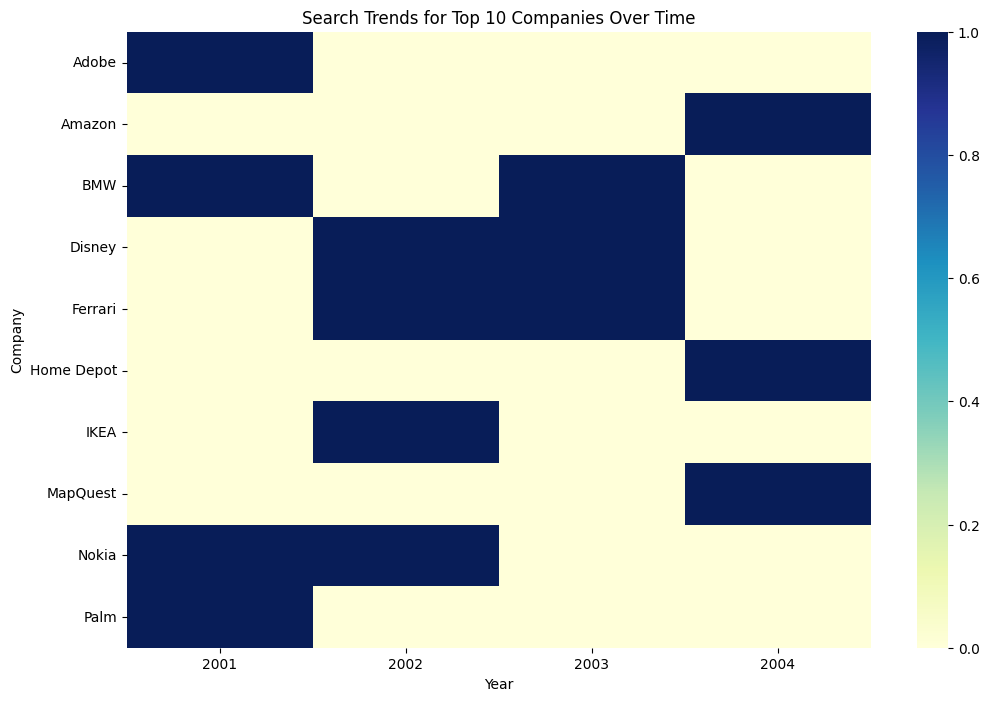

In [31]:
# Let's create a heatmap to visualize the search trends for the top 10 companies over the years
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_query_trend.iloc[:, :10].T, cmap='YlGnBu')
plt.title('Search Trends for Top 10 Companies Over Time')
plt.xlabel('Year')
plt.ylabel('Company')
plt.show()